In [1]:
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import pysal as ps
import mplleaflet
import geopandas as gpd
import json
import pandas as pd
import statsmodels.api as sm
import pylab as plt
import statsmodels.formula.api as smf
from mpl_toolkits.basemap import Basemap
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
met=pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")

In [3]:
def getcoord(x):
    if(type(x)!=float):
        return x[u'coordinates']
    else: return [0,0]
coordinates=met['geolocation'].apply(getcoord)

In [4]:
met['lat']=coordinates.apply(lambda x:x[0])
met['lon']=coordinates.apply(lambda x:x[1])

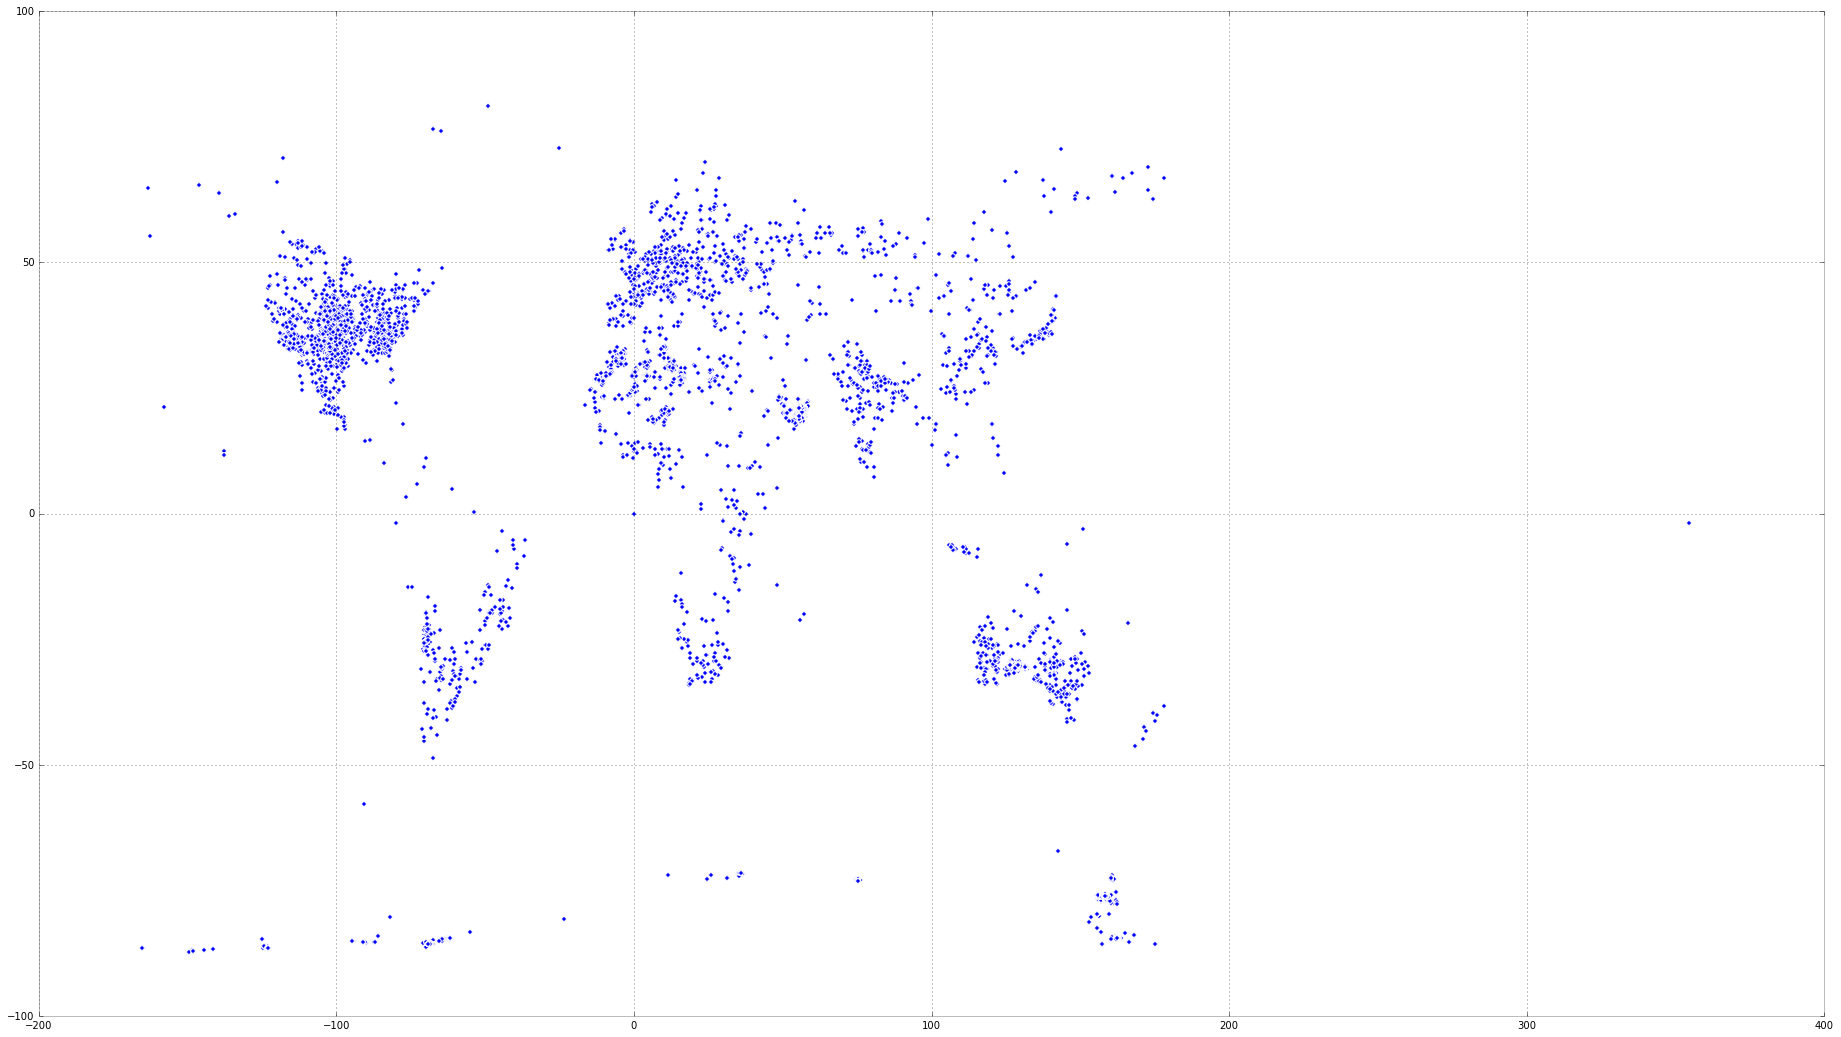

In [5]:
plt.figure(figsize=(32,18))
plt.scatter(met['lat'],met['lon'])

In [6]:
met.columns

Index([u':@computed_region_cbhk_fwbd', u':@computed_region_nnqa_25f4',
                              u'fall',                 u'geolocation',
                                u'id',                        u'mass',
                              u'name',                    u'nametype',
                          u'recclass',                      u'reclat',
                           u'reclong',                        u'year',
                               u'lat',                         u'lon'],
      dtype='object')

In [7]:
metnew=met[[u'mass',u'recclass',u'reclat',u'reclong',u'year',u'lat',u'lon']]

In [8]:
metnew=metnew.fillna(0)

In [9]:
data=pd.get_dummies(metnew, columns=['recclass', 'year'])

# KMeans

In [10]:
from sklearn.preprocessing import scale
values = scale(data.values)

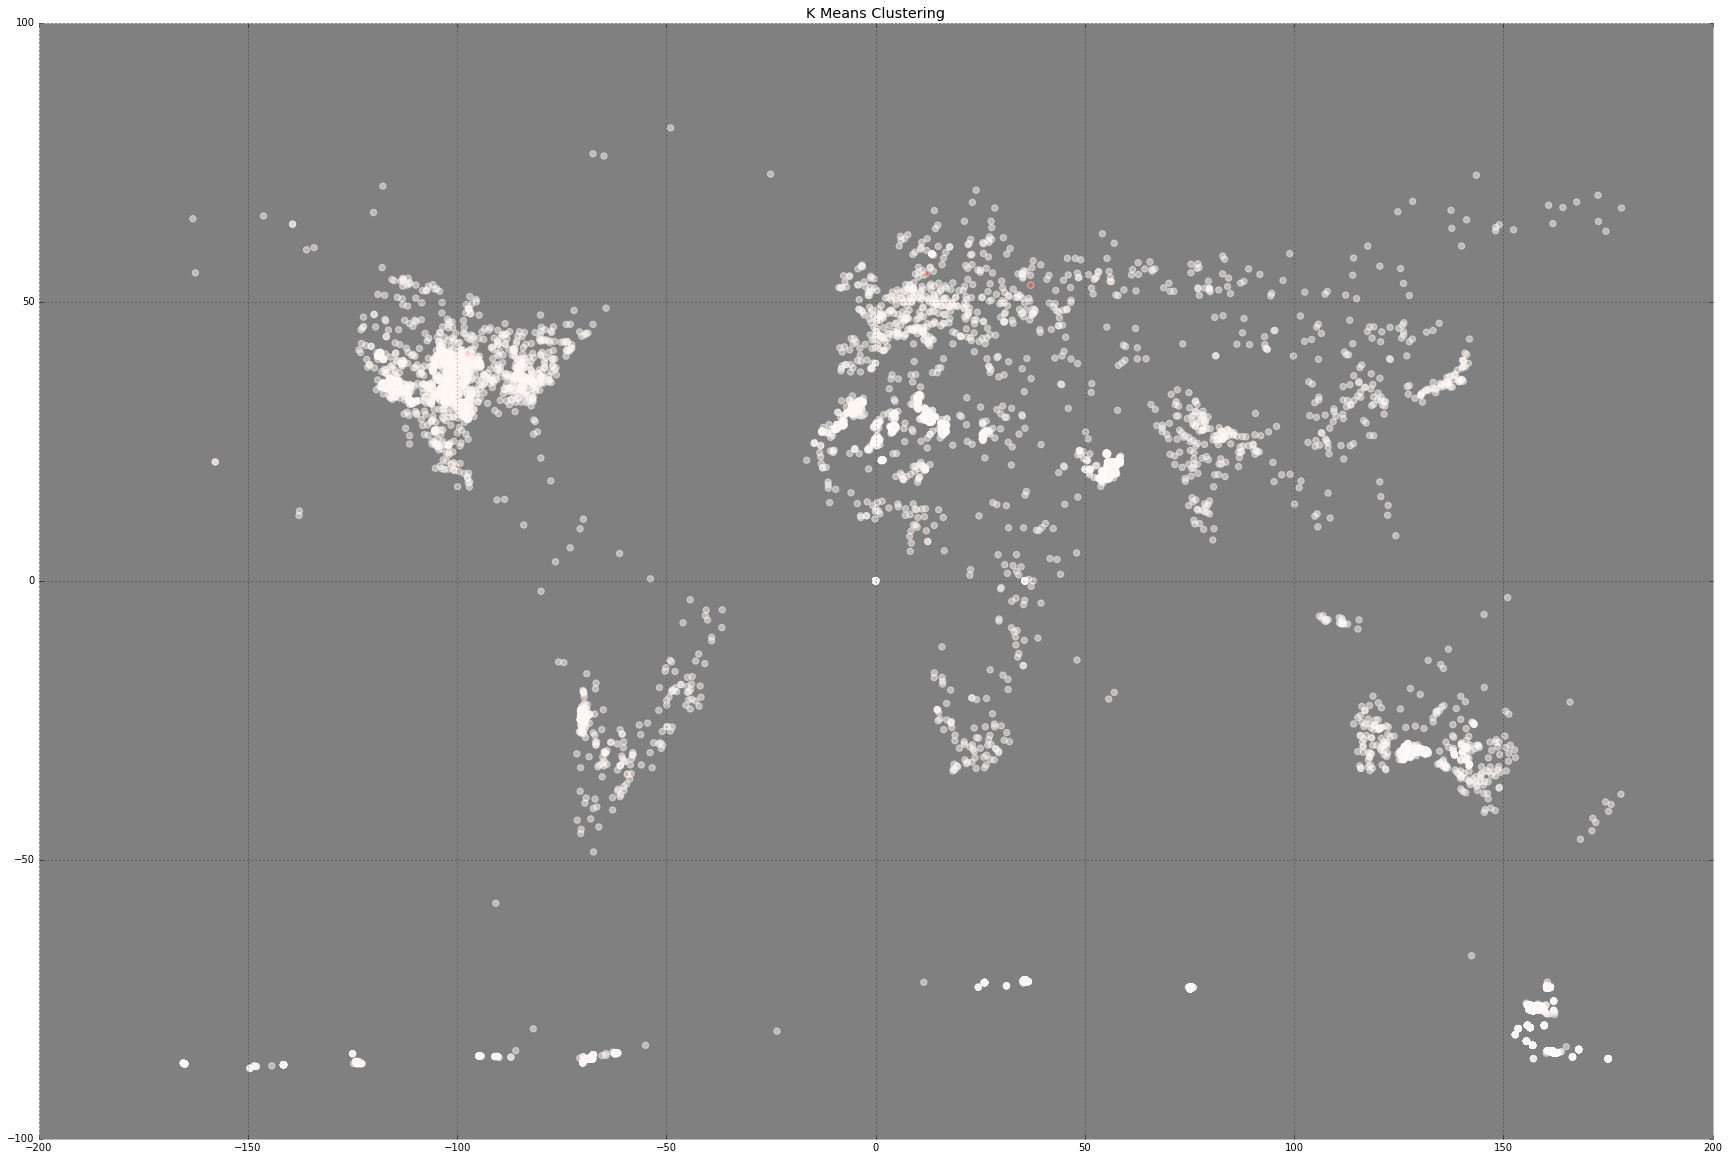

In [11]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans(n_clusters=2)
labels = km.fit_predict(values)
data['label'] = labels
fig,ax = plt.subplots(figsize=(30,20))
ax.scatter(data['lat'], data['lon'], c=data['label'], s=40, alpha=.5, cmap='Reds', vmin=0, vmax=2)
plt.xlim(-200,200)
ax.set_title('%s' % 'K Means Clustering')
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))
 

In [12]:
#calculating silhouette_score to find reasonable number of cluster to use. This will take lot of time.

#from sklearn.cluster import KMeans,DBSCAN
#from sklearn.metrics import silhouette_score
#score = np.zeros(9)
#for k in range(0, 9):
#    est = KMeans(n_clusters = k+2, n_init = 10)
#    est.fit(values)
#    score[k]= silhouette_score(values, est.labels_)
#    print ('At {0} clusters, silhouette score is {1}'.format(k+2, score[k])) 

If code runs sucessfully without crashing your computer, output would be like

At 2 clusters, silhouette score is 0.895250216793

At 3 clusters, silhouette score is 0.712506482256

At 4 clusters, silhouette score is 0.246539483687

At 5 clusters, silhouette score is -0.0639803624529

At 6 clusters, silhouette score is -0.0391920898655

At 7 clusters, silhouette score is -0.186905228891

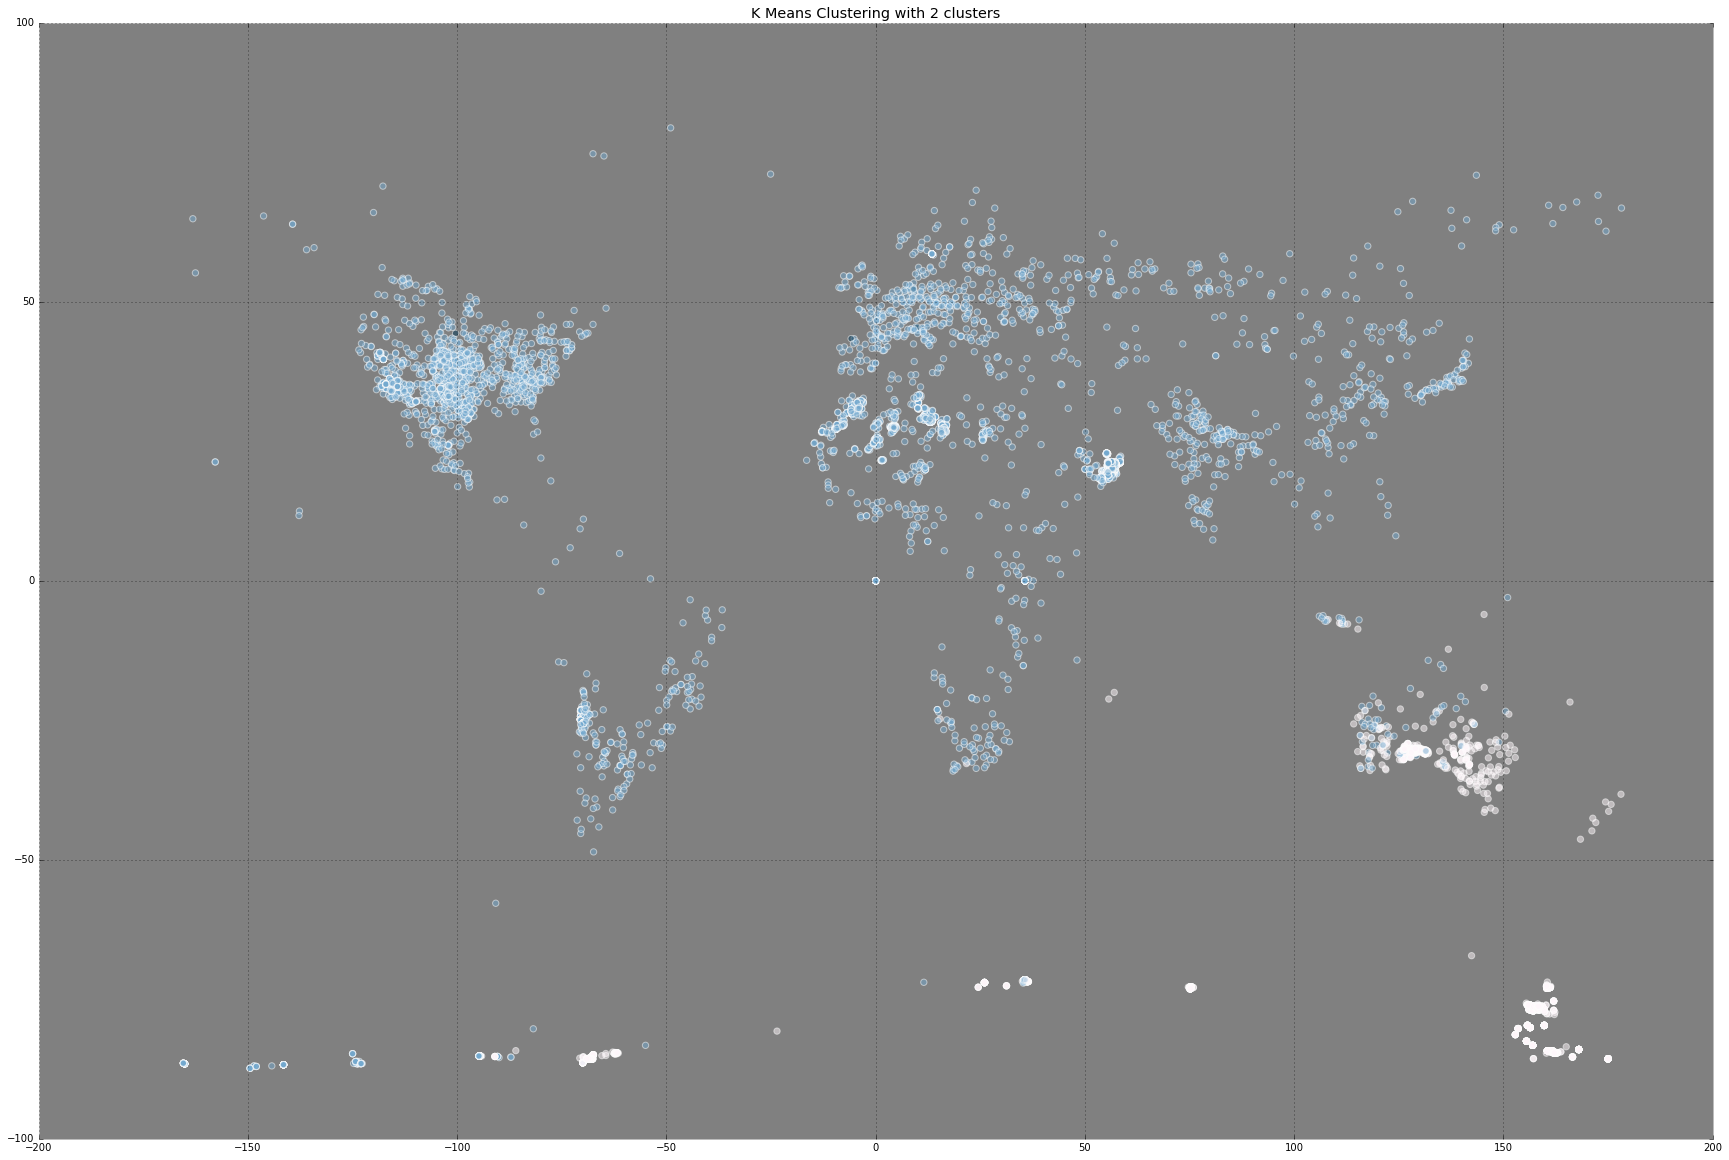

In [16]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans(n_clusters=3)
labels = km.fit_predict(values)
data['label'] = labels
fig,ax = plt.subplots(figsize=(30,20))
ax.scatter(data['lat'], data['lon'], c=data['label'], s=40, alpha=.5, cmap='PuBu', vmin=0, vmax=2)
plt.xlim(-200,200)
ax.set_title('%s' % 'K Means Clustering with 2 clusters')
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))
 

# Gaussian Mixture Model

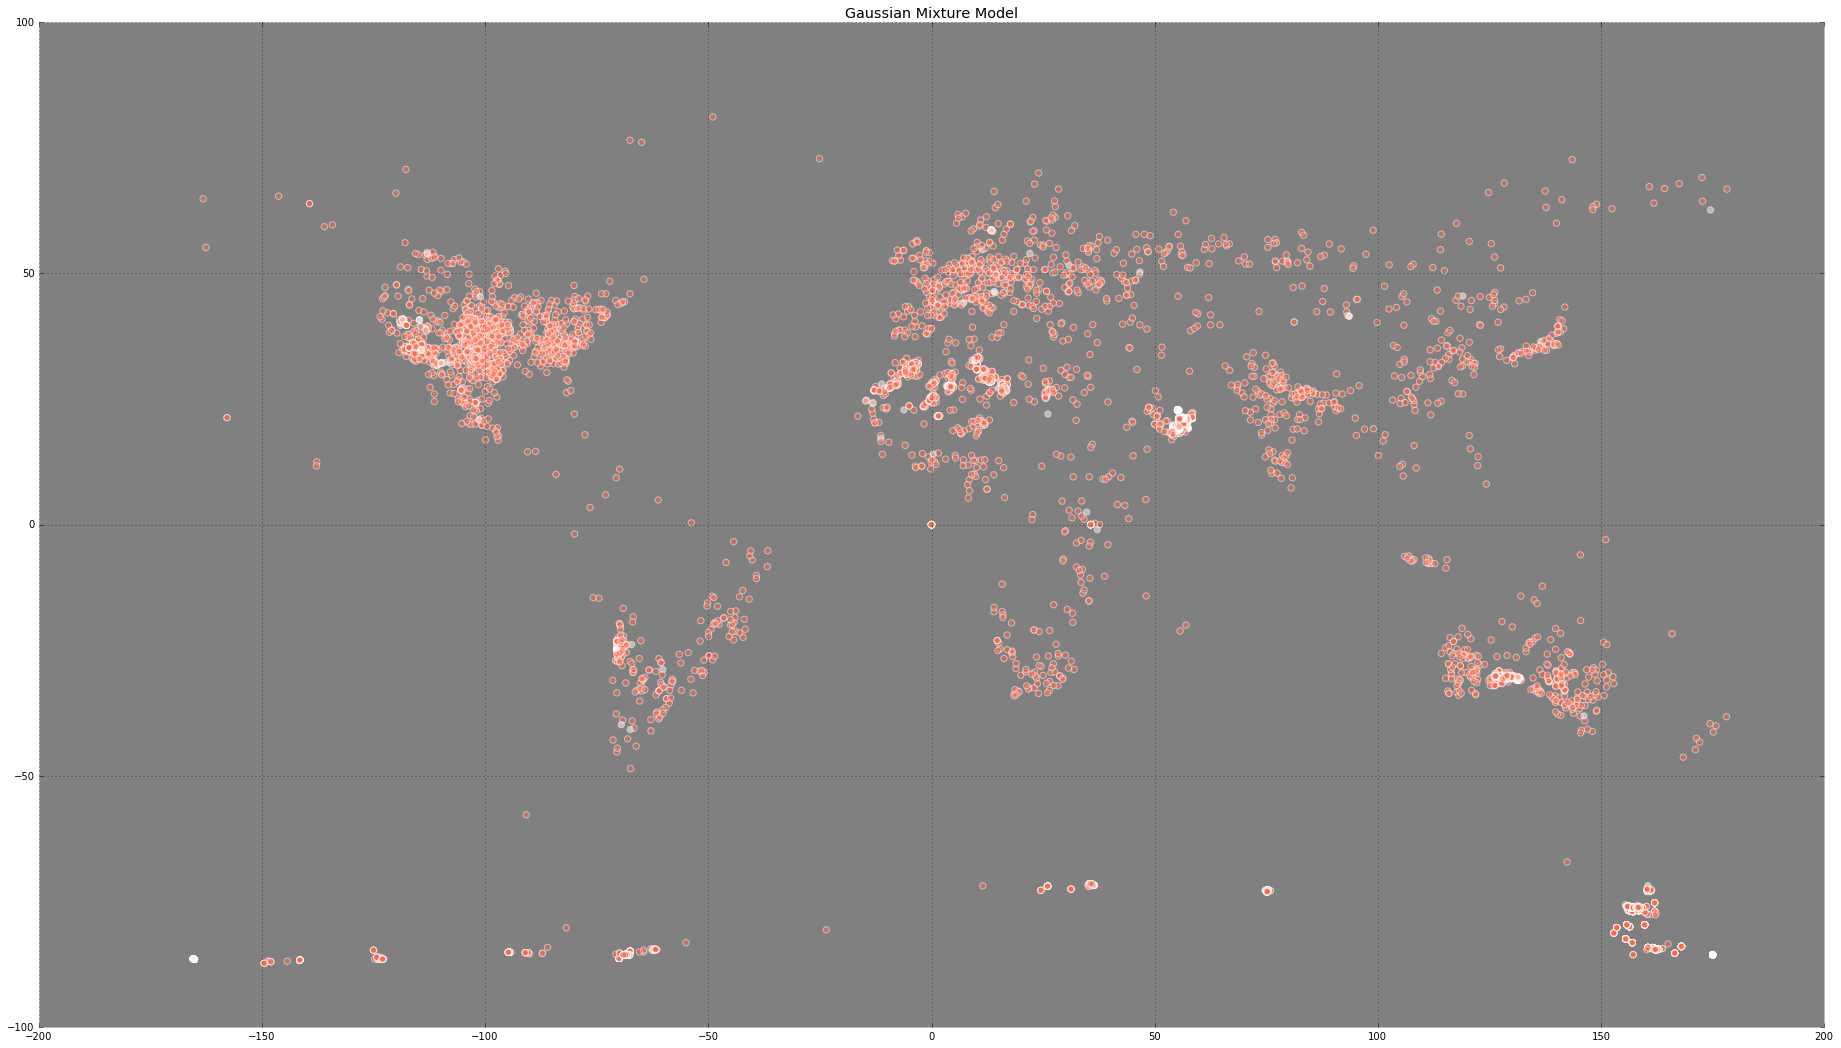

In [14]:
from sklearn.mixture import GMM
gm = GMM(n_components=2)
# Create figure
fig,ax = plt.subplots(figsize=(32,18))
labels = gm.fit_predict(values[:,2:])
data['label'] = labels
ax.scatter(data['lat'], data['lon'], c=data['label'], s=40, alpha=.5, cmap='Reds', vmin=0, vmax=2)
plt.xlim(-200,200)
ax.set_title('%s' % 'Gaussian Mixture Model')
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))
 

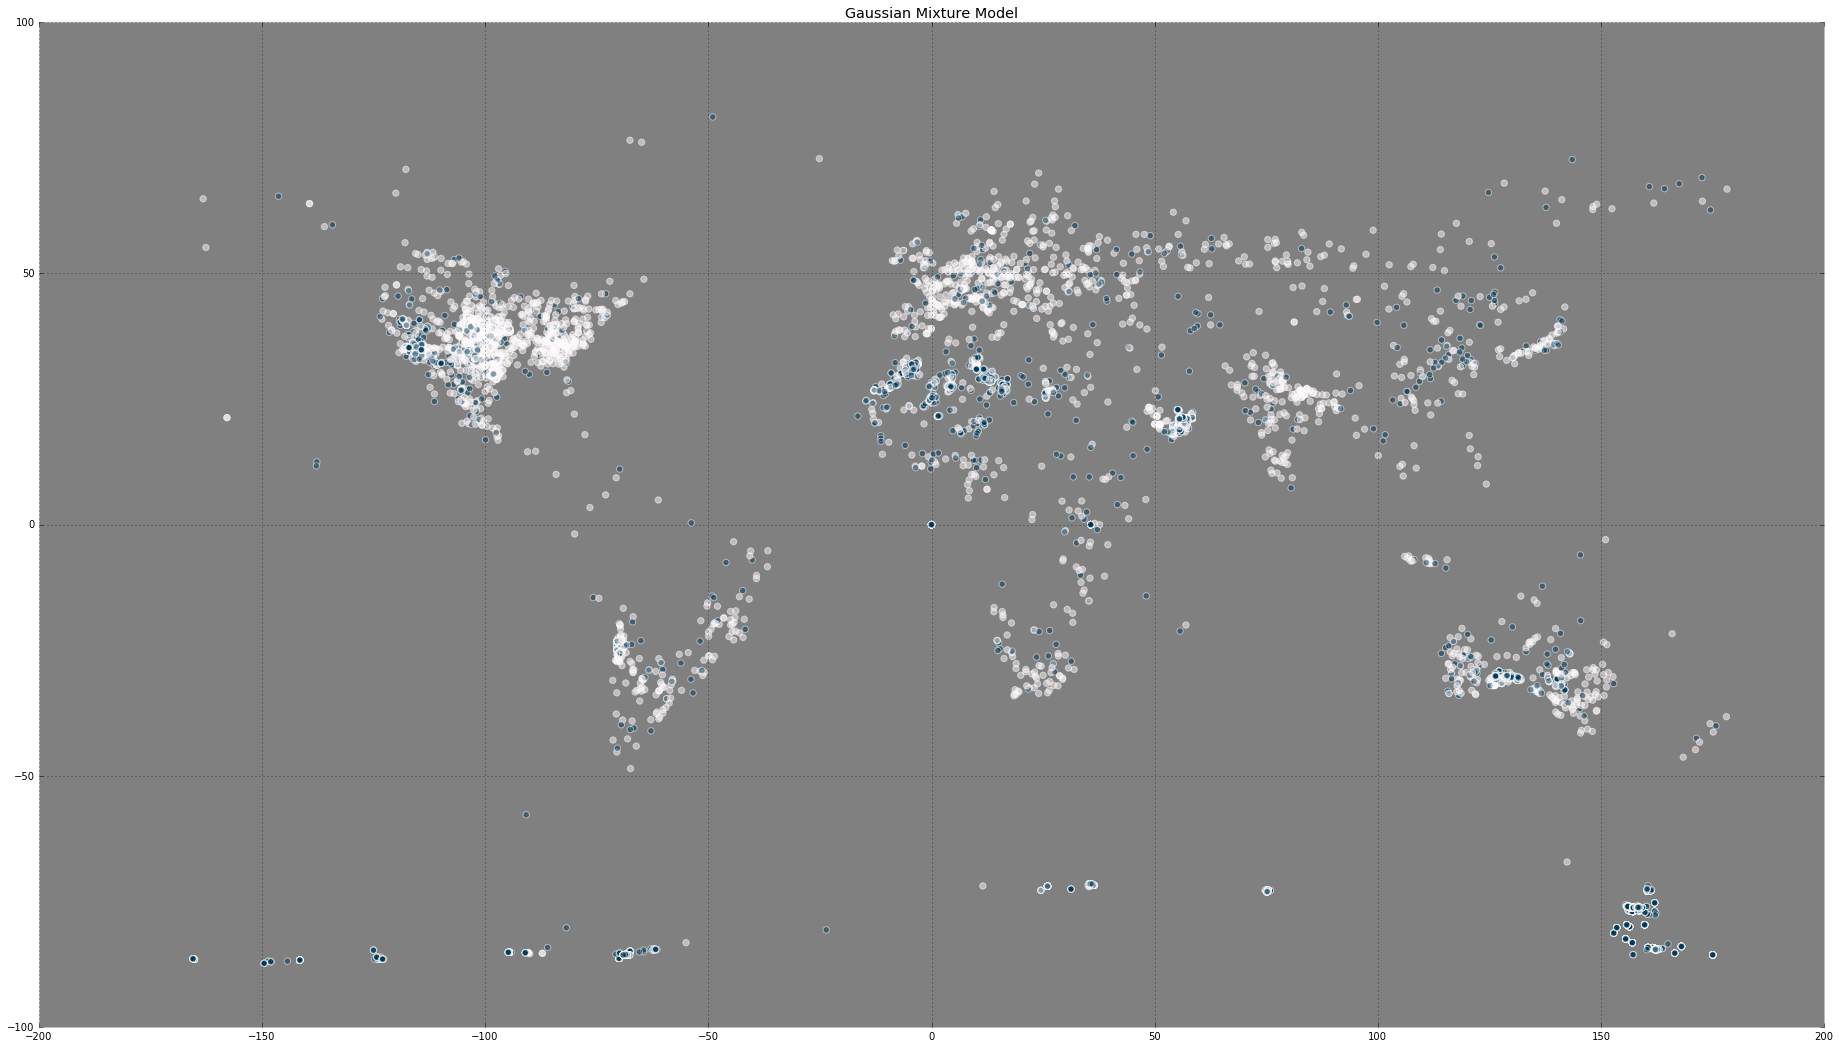

In [15]:
from sklearn.mixture import GMM
gm = GMM(n_components=3)
# Create figure
fig,ax = plt.subplots(figsize=(32,18))
labels = gm.fit_predict(values[:,2:])
data['label'] = labels
ax.scatter(data['lat'], data['lon'], c=data['label'], s=40, alpha=.5, cmap='PuBu', vmin=0, vmax=2)
plt.xlim(-200,200)
ax.set_title('%s' % 'Gaussian Mixture Model')
ax.set_axis_bgcolor((0.5019607843137255, 0.5019607843137255, 0.5019607843137255))

KMeans with 3 clusters suggests australia as 1 cluster and rest of the world as other. 3rd clusters are dark blue dots spread out scarcely. 2 cluster in Kmeans having the highest silhouette score doesn't differentiate the clusters clearly. It looks more like 1 big cluster with other appearing to be an outlier. This suggests better techniques may be used to identify if meteorites has any significant patterns in a given space-time spread. 

Gaussian have better visisblity in both 2 and 3 clusters choice. Although not too significant in 2 cluster choice similar to KMeans. Other clustering methods might be tested to check consistency or find better reults.

Purpose of clustering is to find out which areas are similar and which areas are different in terms of metorites found throughout the world. One model suggest australia is different with rest of the world in terms of time of impact, size, mass and composition of the meteorite found there while other tells a different story. Perhaps further analysis and research would be needed to suggest if patterts found are true or there is mistake in the approach.